# Coursera Image and video processing
## Week 1

1. Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.
2. Using any programming language you feel comfortable with (it is though recommended to use the provided free Matlab), load an image and then perform a simple spatial 3x3 average of image pixels. In other words, replace the value of every pixel by the average of the values in its 3x3 neighborhood. If the pixel is located at (0,0), this means averaging the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0), (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the image boundaries. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood. Observe what happens to the image (we will discuss this in more details in the very near future, about week 3).
3. Rotate the image by 45 and 90 degrees (Matlab provides simple command lines for doing this).
4. For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks. If you are using Matlab, investigate simple command lines to do this important operation.

## Setup
Load useful libraries and display sample image.

In [2]:
%matplotlib inline

In [3]:
# Need to rearrange color channels to go between opencv image and matplotlib image
def cv2mat(im):
    b, g, r = cv2.split(im)
    return cv2.merge([r,g,b])

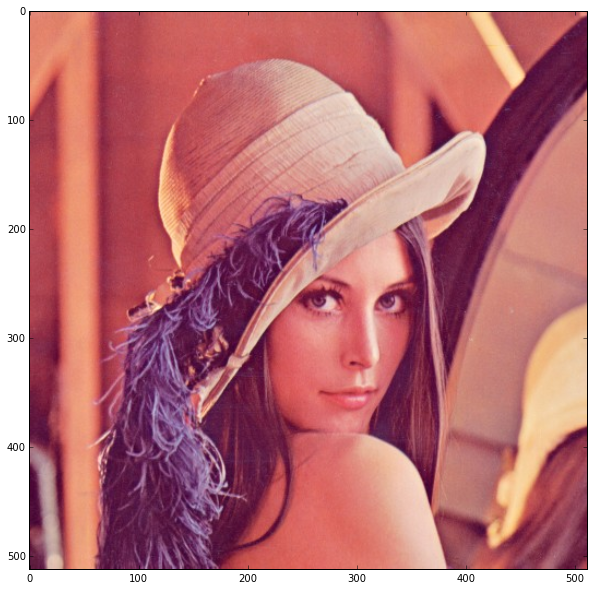

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10

im = cv2.imread('lena color.jpg')
im_mat = cv2mat(im)
plt.imshow(im_mat)

## Question 1
Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

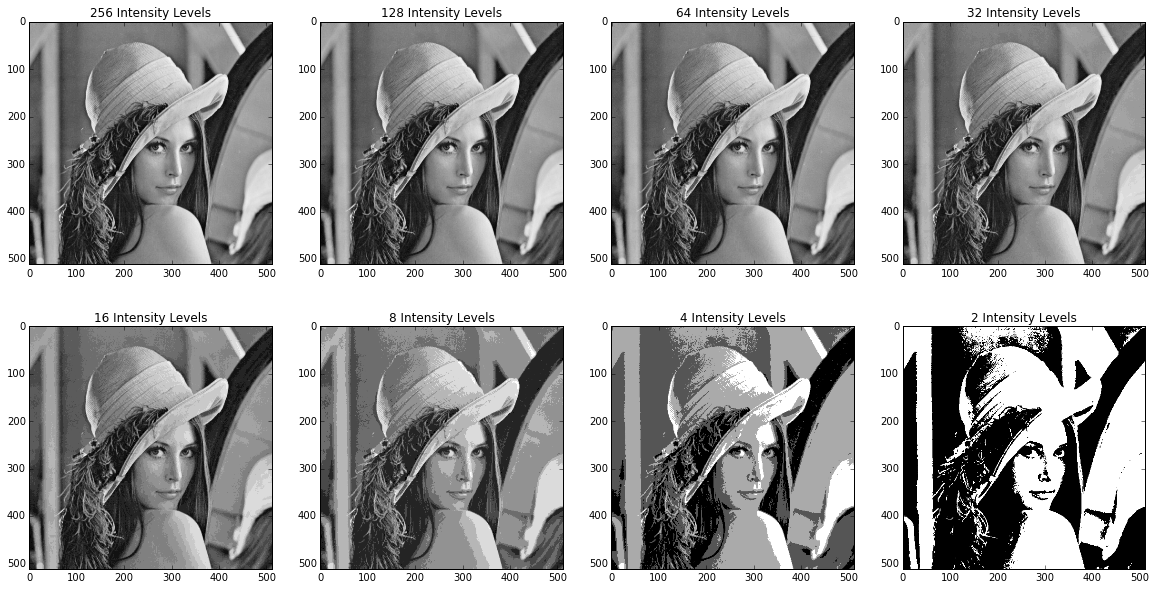

In [6]:
rows, cols = 2,4

f, axarr = plt.subplots(rows, cols)

im_bw = cv2.cvtColor(im, cv2.cv.CV_BGR2GRAY) # convert to grayscale

plt.gray()

levels = 256
for row in xrange(rows):
    for col in xrange(cols):
        im_down = (im_bw//(256.0/levels))*(256.0/levels) 
        axarr[row, col].imshow(im_down)
        axarr[row, col].set_title('{} Intensity Levels'.format(levels))
        levels /= 2

## Question 2
Using any programming language you feel comfortable with (it is though recommended to use the provided free Matlab), load an image and then perform a simple spatial 3x3 average of image pixels. In other words, replace the value of every pixel by the average of the values in its 3x3 neighborhood. If the pixel is located at (0,0), this means averaging the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0), (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the image boundaries. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood. Observe what happens to the image (we will discuss this in more details in the very near future, about week 3).

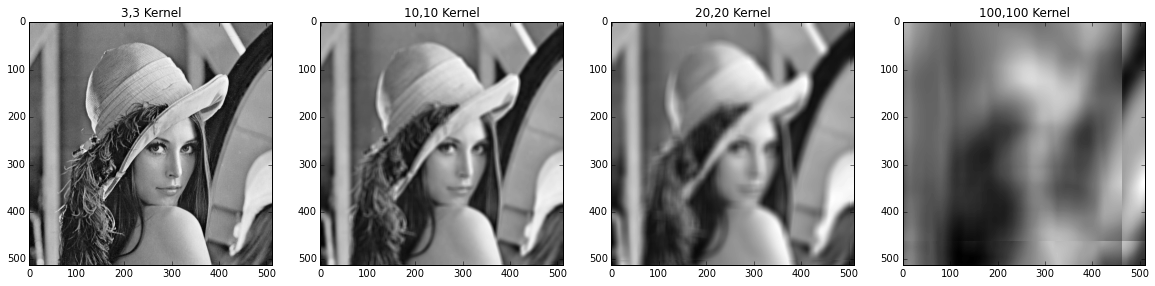

In [27]:
rows, cols = im_bw.shape

kernels = [(3,3), (10,10), (20,20), (100,100)]
f, axarr = plt.subplots(1, len(kernels))

for idx, kernel in enumerate(kernels):
    im_out = np.zeros(im_bw.shape, dtype=np.uint8)
    for row in xrange(rows):
        for col in xrange(cols):
            if row-((kernel[0]-1)/2) <= 0:
                start_y = 0
                end_y = row+((kernel[0]-1)/2)
            elif row+((kernel[0]-1)/2) >= rows-1:
                start_y = row-((kernel[0]-1)/2)
                end_y = row
            else:
                start_y = row-((kernel[0]-1)/2)
                end_y = row+((kernel[0]-1)/2)

            if col-((kernel[1]-1)/2) <= 0:
                start_x = 0
                end_x = col+((kernel[1]-1)/2)
            elif col+((kernel[1]-1)/2) >= cols-1:
                start_x = col-((kernel[1]-1)/2)
                end_x = col
            else:
                start_x = col-((kernel[1]-1)/2)
                end_x = col+((kernel[1]-1)/2)

            im_out[row, col] = np.average(im_bw[start_y:end_y, start_x:end_x])

    axarr[idx].imshow(im_out)
    axarr[idx].set_title('{},{} Kernel'.format(kernel[0], kernel[1]))
    